<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Data Analysis</center></h1>
<h2><center>Seminar: Linear Classification</center></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# First of all..
Let's finish previous seminar super fast!

# Now, Linear classification

## Toy example

Generate data and apply logistic regression

In [2]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) + [2, 2],
          np.random.randn(20, 2) + [-2, -2]]
y = [-1] * 20 + [1] * 20

In [4]:
y[:10]

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]

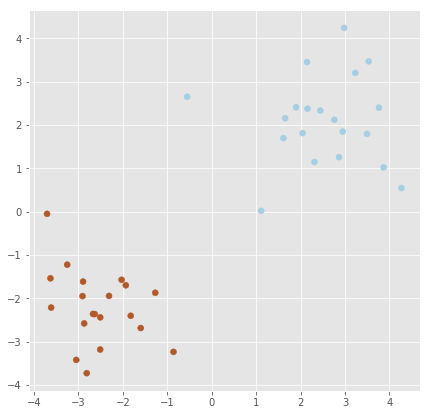

In [3]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:, 0],
           X[:, 1],
           c=y,
           cmap=plt.cm.Paired)

In [5]:
from sklearn.linear_model import LogisticRegression

Fit logistic regression and plot desicion boundary

In [23]:
model = LogisticRegression(C=1.0, 
                           fit_intercept=True, 
                           penalty='l2')
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
print 'w_0 = %f' % model.intercept_
print 'w_1, w_2 = ', model.coef_

w_0 = -0.183954
w_1, w_2 =  [[-1.06097157 -1.00171289]]


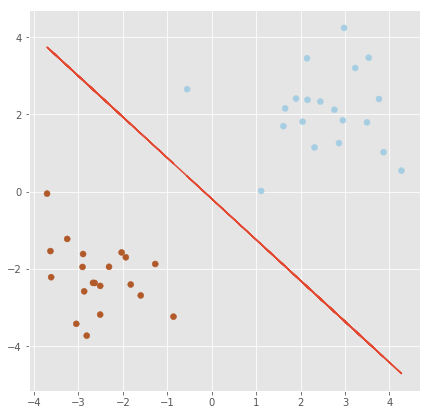

In [25]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:, 0],
           X[:, 1],
           c=y,
           cmap=plt.cm.Paired)

w_0 = model.intercept_
w_1, w_2 = model.coef_[0]

g = lambda x1: (-w_1*x1 - w_0)/w_2

x1 = X[:, 0]
x2 = g(x1)

plt.plot(x1, x2)

In [26]:
y_hat = model.predict(X)
y_hat[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [27]:
y_hat_proba = model.predict_proba(X)
y_hat_proba[:10, :]

array([[  9.98616528e-01,   1.38347180e-03],
       [  9.99496019e-01,   5.03981209e-04],
       [  9.95091160e-01,   4.90883960e-03],
       [  9.94323473e-01,   5.67652674e-03],
       [  9.90157090e-01,   9.84290974e-03],
       [  9.97319087e-01,   2.68091305e-03],
       [  9.94720579e-01,   5.27942062e-03],
       [  9.94026880e-01,   5.97312006e-03],
       [  9.96628393e-01,   3.37160720e-03],
       [  9.77815343e-01,   2.21846572e-02]])

In [28]:
dec_func = model.decision_function(X)
dec_func[:10]

array([-6.58177471, -7.59246747, -5.31179677, -5.16572302, -4.61111223,
       -5.91891334, -5.23864551, -5.11449484, -5.68898843, -3.78591991])

## How to make non-linear decision boundary?

Consider "bublic" dataset

In [29]:
from sklearn.datasets import make_circles

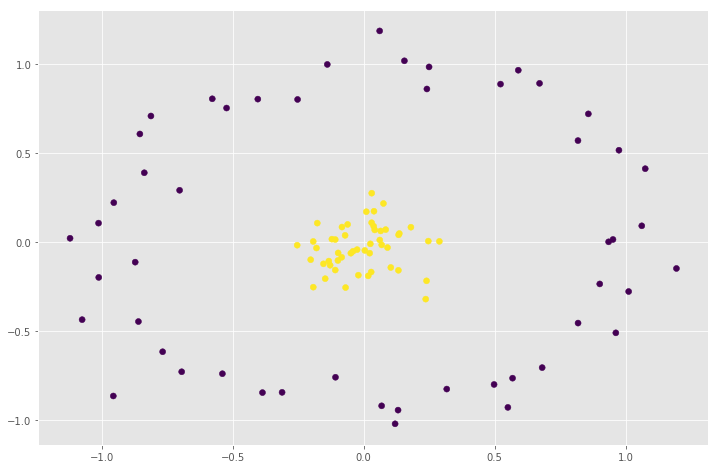

In [30]:
X, y = make_circles(n_samples=100, shuffle=True,
                    noise = 0.1,
                    factor=0.1)

plt.scatter(X[:, 0],
            X[:, 1],
            c=y)

It is clear that classes cannot be separated via line.

So what we do is we should add nonliear feature to our model and then project decision boundary on to intial feature space

What feature should we add?


In [34]:
X_new = np.c_[X[:,0], X[:,1], X[:, 0]**2+X[:, 1]**2]
model = LogisticRegression(C=100000, 
                           fit_intercept=True)
model.fit(X_new, y)

LogisticRegression(C=100000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [35]:
# Error rate
y_hat = model.predict(X_new)
(y != y_hat).sum()

0

In [39]:
x0.ravel()

array([ -1.50000000e+00,  -1.40000000e+00,  -1.30000000e+00,
        -1.20000000e+00,  -1.10000000e+00,  -1.00000000e+00,
        -9.00000000e-01,  -8.00000000e-01,  -7.00000000e-01,
        -6.00000000e-01,  -5.00000000e-01,  -4.00000000e-01,
        -3.00000000e-01,  -2.00000000e-01,  -1.00000000e-01,
         1.33226763e-15,   1.00000000e-01,   2.00000000e-01,
         3.00000000e-01,   4.00000000e-01,   5.00000000e-01,
         6.00000000e-01,   7.00000000e-01,   8.00000000e-01,
         9.00000000e-01,   1.00000000e+00,   1.10000000e+00,
         1.20000000e+00,   1.30000000e+00,   1.40000000e+00,
        -1.50000000e+00,  -1.40000000e+00,  -1.30000000e+00,
        -1.20000000e+00,  -1.10000000e+00,  -1.00000000e+00,
        -9.00000000e-01,  -8.00000000e-01,  -7.00000000e-01,
        -6.00000000e-01,  -5.00000000e-01,  -4.00000000e-01,
        -3.00000000e-01,  -2.00000000e-01,  -1.00000000e-01,
         1.33226763e-15,   1.00000000e-01,   2.00000000e-01,
         3.00000000e-01,

In [41]:
X_grid.shape

(900, 3)

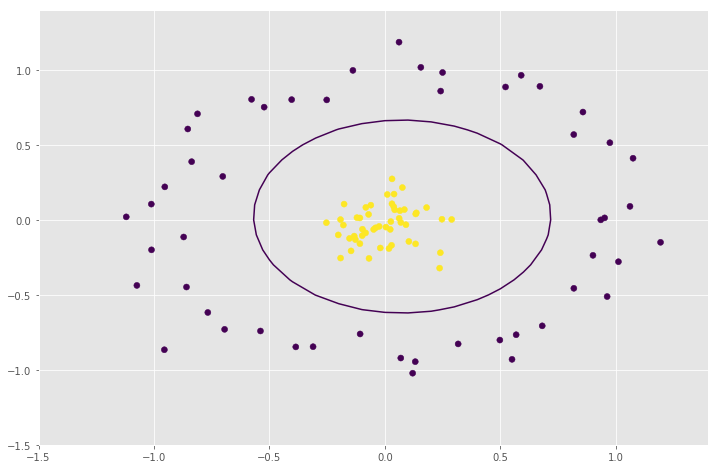

In [40]:
# Plot desicion border

x0, x1 = np.meshgrid(np.arange(-1.5, 1.5, 0.1),
                       np.arange(-1.5, 1.5, 0.1))
xx0, xx1 = x0.ravel(), x1.ravel()

X_grid = np.c_[xx0, xx1, xx0**2 + xx1**2]

y_hat = model.decision_function(X_grid)
y_hat = y_hat.reshape(x0.shape)

plt.contour(x0, x1, y_hat, levels=[0])
plt.scatter(X[:,0], 
            X[:, 1], 
            c=y)

## Practical task - sentiment analysis

Load text files from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00331/). There should be an archive with 3 datasets
* imdb.com
* amazon.com
* yelp.com

File format:
Review \t class label \n


### Task
1. Load files and set target features and review in different variables
2. Fit logistic regression to it. Consider text feature preprocessing
3. Output the most valuable coefficients and analyze them

In [47]:
df = pd.read_csv('sentiment/amazon_cells_labelled.txt', 
                 sep='\t', header=None, 
                 names=['review', 'class'])

In [48]:
df.head()

,review,class
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [49]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
vect = CountVectorizer(stop_words='english', 
                       max_df=0.95, 
                       min_df=5,
                       ngram_range=(1,1),
                       analyzer='word')

In [53]:
texts = df.review.values

In [54]:
texts[:10]

array([ 'So there is no way for me to plug it in here in the US unless I go by a converter.',
       'Good case, Excellent value.', 'Great for the jawbone.',
       'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
       'The mic is great.',
       'I have to jiggle the plug to get it to line up right to get decent volume.',
       'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.',
       'If you are Razr owner...you must have this!',
       'Needless to say, I wasted my money.',
       'What a waste of money and time!.'], dtype=object)

In [55]:
vect.fit(texts)

CountVectorizer(analyzer='word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.95, max_features=None, min_df=5,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [56]:
X = vect.transform(texts)

In [61]:
X

<1000x203 sparse matrix of type '<type 'numpy.int64'>'
	with 2612 stored elements in Compressed Sparse Row format>

In [60]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [58]:
vect.get_feature_names()

[u'amazon',
 u'arrived',
 u'audio',
 u'awesome',
 u'bad',
 u'battery',
 u'belt',
 u'best',
 u'better',
 u'big',
 u'black',
 u'bluetooth',
 u'bought',
 u'broke',
 u'buttons',
 u'buy',
 u'cable',
 u'calls',
 u'came',
 u'camera',
 u'car',
 u'case',
 u'cases',
 u'cell',
 u'charge',
 u'charger',
 u'charging',
 u'charm',
 u'cheap',
 u'clarity',
 u'clear',
 u'color',
 u'comfortable',
 u'company',
 u'completely',
 u'connection',
 u'cool',
 u'couldn',
 u'couple',
 u'crap',
 u'customer',
 u'days',
 u'definitely',
 u'design',
 u'device',
 u'did',
 u'didn',
 u'different',
 u'difficult',
 u'disappointed',
 u'disappointing',
 u'disappointment',
 u'does',
 u'doesn',
 u'don',
 u'dropped',
 u'ear',
 u'ears',
 u'easily',
 u'easy',
 u'end',
 u'especially',
 u'excellent',
 u'expect',
 u'far',
 u'feature',
 u'feels',
 u'fine',
 u'fit',
 u'fits',
 u'free',
 u'gets',
 u'going',
 u'good',
 u'got',
 u'great',
 u'hands',
 u'happy',
 u'hard',
 u'having',
 u'headphones',
 u'headset',
 u'headsets',
 u'hear',
 u'he

In [59]:
from sklearn.pipeline import Pipeline

In [80]:
model = Pipeline([
    ('vect', CountVectorizer(stop_words='english', 
                             max_df=0.95, 
                             min_df=5,
                             ngram_range=(1,1),
                             analyzer='word')),
    ('clf', LogisticRegression())
])

In [81]:
y = df.loc[:, 'class'].values

In [82]:
model.fit(texts, y)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.95, max_features=None, min_df=5,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
     ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [83]:
coefs = model.steps[1][1].coef_[0]

In [77]:
words = model.steps[0][1].get_feature_names()

In [78]:
weights = pd.Series(index=words, data=coefs)

In [79]:
weights.sort_values()

waste money         -1.529403
does work           -1.273115
don buy             -1.264128
did work            -1.214517
doesn work          -1.150775
piece junk          -1.150775
customer service    -1.120325
car charger          0.105221
battery life         0.174990
phone ve             0.254058
bluetooth headset    0.318419
cell phone           0.600354
sound quality        0.713308
good quality         1.085922
excellent product    1.109651
good product         1.204467
easy use             1.204467
works fine           1.321191
great product        1.321191
highly recommend     1.458147
great phone          1.526119
works great          2.008502
dtype: float64

## Perceptron algorithm

Consider a linear model with the following loss function on an object

$$L(w) = (-y_i\cdot(w^\top x_i+w_0))_+$$

Where $y_i\in \{-1, +1\}$

Implement **stochastic** gradient algorithm for this loss function (Прабило Хэбба) for the following dataset

In [ ]:
np.random.seed(123)
X = np.r_[np.random.randn(20, 2) + [2, 2],
          np.random.randn(20, 2) + [-2, -2]]
y = [-1] * 20 + [1] * 20

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:, 0],
           X[:, 1],
           c=y,
           cmap=plt.cm.Paired)